# Initial cleaning: First, we import all the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### * Then we load the data into a data frame called DF.

In [2]:
fp = 'C:\Projects\self\DA\PAYROLL\payroll.csv' #file path
df = pd.read_csv(fp, low_memory=False , index_col='RECORD_NBR')

#### * Then we analyze the structure of the data, look for missing values, and the data types of the columns.

In [3]:
df.head()

,PAY_YEAR,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_CLASS_PGRADE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,MOU,MOU_TITLE,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
RECORD_NBR,,,,,,,,,,,,,,,,,
303030303632,2017,98,WATER AND POWER,3156-5,CUSTODIAN,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,55725.24,4785.05,2021.84,62532.13,3678.0,23508.9,FEMALE,HISPANIC
3030303036,2017,98,WATER AND POWER,9105-5,UTILITY ADMINISTRATOR,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,139174.88,16340.50,6170.49,161685.87,9186.0,23508.9,FEMALE,ASIAN AMERICAN
303030313232,2017,98,WATER AND POWER,9602-4,WATER SERVICES MANAGER,FULL_TIME,ACTIVE,M,MANAGEMENT EMPLOYEES UNIT,245879.12,0.00,12504.30,258383.42,16228.0,23508.9,MALE,BLACK
303030313632,2017,98,WATER AND POWER,5885-5,WTR TRTMT OPR,FULL_TIME,ACTIVE,6,STEAM PLANT AND WATER SUPPLY UNIT,101494.34,7824.99,12630.52,121949.85,6699.0,23508.9,MALE,ASIAN AMERICAN
303030323632,2017,98,WATER AND POWER,3841-5,ELTL MCHC,FULL_TIME,ACTIVE,8,OPERATING MAINTENANCE AND SERVICE UNIT,101345.12,22284.37,1566.75,125196.24,6689.0,23508.9,MALE,HISPANIC


In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,2)))

PAY_YEAR - 0.0%
DEPARTMENT_NO - 0.0%
DEPARTMENT_TITLE - 0.0%
JOB_CLASS_PGRADE - 0.08%
JOB_TITLE - 0.08%
EMPLOYMENT_TYPE - 0.0%
JOB_STATUS - 0.0%
MOU - 0.1%
MOU_TITLE - 0.11%
REGULAR_PAY - 0.0%
OVERTIME_PAY - 0.06%
ALL_OTHER_PAY - 0.06%
TOTAL_PAY - 0.0%
CITY_RETIREMENT_CONTRIBUTIONS - 0.0%
BENEFIT_PAY - 0.0%
GENDER - 0.56%
ETHNICITY - 0.61%


#### * There are less than 1%missing values in columns: JOB_CLASS_PGRADE, MOU, MOU_TITLE, REGULAR_PAY, OVERTIME_PAY, ALL_OTHER_PAY, GENDER, ETHNICITY.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 685461 entries, 303030303632 to 393939353933
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   PAY_YEAR                       685461 non-null  int64  
 1   DEPARTMENT_NO                  685461 non-null  int64  
 2   DEPARTMENT_TITLE               685461 non-null  object 
 3   JOB_CLASS_PGRADE               684919 non-null  object 
 4   JOB_TITLE                      684919 non-null  object 
 5   EMPLOYMENT_TYPE                685461 non-null  object 
 6   JOB_STATUS                     685461 non-null  object 
 7   MOU                            684777 non-null  object 
 8   MOU_TITLE                      684712 non-null  object 
 9   REGULAR_PAY                    685461 non-null  float64
 10  OVERTIME_PAY                   685027 non-null  float64
 11  ALL_OTHER_PAY                  685027 non-null  float64
 12  TOTAL_PAY         

In [6]:
df.describe()

,PAY_YEAR,DEPARTMENT_NO,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY
count,685461.000000,685461.000000,685461.000000,685027.000000,6.850270e+05,6.854610e+05,685461.000000,685461.000000
mean,2017.456439,64.856691,61570.361595,8584.027444,4.694393e+03,7.484059e+04,17802.811183,9623.798229
std,2.745638,29.634869,45964.110521,19452.988419,1.090751e+04,5.935044e+04,18868.220957,7777.633740
min,2013.000000,2.000000,-14952.000000,-24903.620000,-6.908210e+04,-1.784015e+04,-19348.630000,-12592.450000
25%,2015.000000,40.000000,16969.680000,0.000000,1.400000e+02,1.924160e+04,0.000000,1493.980000
50%,2018.000000,70.000000,61441.440000,366.000000,1.595760e+03,7.052189e+04,12058.880000,8617.970000
75%,2020.000000,88.000000,96202.120000,7864.300000,4.945600e+03,1.133686e+05,28222.150000,16461.120000
max,2022.000000,98.000000,462502.960000,434393.940000,2.394972e+06,2.394972e+06,164873.430000,255614.840000


#### * There are negative values in REGULAR_PAY, OVERTIME_PAY, ALL_OTHER_PAY, and TOTAL_PAY which should also be removed.

#### Removing null

In [7]:
df.dropna(inplace=True)
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,2)))

PAY_YEAR - 0.0%
DEPARTMENT_NO - 0.0%
DEPARTMENT_TITLE - 0.0%
JOB_CLASS_PGRADE - 0.0%
JOB_TITLE - 0.0%
EMPLOYMENT_TYPE - 0.0%
JOB_STATUS - 0.0%
MOU - 0.0%
MOU_TITLE - 0.0%
REGULAR_PAY - 0.0%
OVERTIME_PAY - 0.0%
ALL_OTHER_PAY - 0.0%
TOTAL_PAY - 0.0%
CITY_RETIREMENT_CONTRIBUTIONS - 0.0%
BENEFIT_PAY - 0.0%
GENDER - 0.0%
ETHNICITY - 0.0%


#### Removing Negative values

In [8]:
df = df.loc[
            (df['OVERTIME_PAY'] >= 0) & (df['REGULAR_PAY'] >= 0)& (df['ALL_OTHER_PAY'] >= 0) 
            & (df['TOTAL_PAY'] >= 0) & (df['CITY_RETIREMENT_CONTRIBUTIONS'] >= 0) & (df['BENEFIT_PAY'] >= 0)
           ]
df.describe()

,PAY_YEAR,DEPARTMENT_NO,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY
count,676293.000000,676293.000000,676293.000000,676293.000000,6.762930e+05,6.762930e+05,676293.000000,676293.000000
mean,2017.482848,64.661651,61690.623555,8611.785528,4.676425e+03,7.497883e+04,17875.049819,9590.874216
std,2.740500,29.618914,45918.816926,19502.650139,1.081117e+04,5.936573e+04,18867.038097,7776.440750
min,2013.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2015.000000,40.000000,17125.280000,0.000000,1.500000e+02,1.935209e+04,0.000000,1480.450000
50%,2018.000000,70.000000,61663.360000,367.500000,1.603450e+03,7.064709e+04,12295.540000,8545.560000
75%,2020.000000,88.000000,96273.120000,7890.820000,4.940470e+03,1.134998e+05,28321.980000,16276.560000
max,2022.000000,98.000000,462502.960000,434393.940000,2.394972e+06,2.394972e+06,164873.430000,255614.840000


#### * There are minimum values in TOTAL_PAY which is less than the minimum wage which is not possible.  We also remove data that are clearly less than minimum wage and not from the year 2022 because we only have 6 months of data from 2022.

In [9]:
df = df.loc[((df['TOTAL_PAY'] >= 15600) & (df['PAY_YEAR'] != 2022))]
df.describe()

,PAY_YEAR,DEPARTMENT_NO,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY
count,490558.000000,490558.000000,490558.000000,490558.000000,4.905580e+05,4.905580e+05,490558.000000,490558.000000
mean,2017.158674,64.561424,80144.481133,11338.354410,5.922822e+03,9.740566e+04,23285.385321,12462.185825
std,2.558313,29.661959,39179.361367,21924.785864,1.192657e+04,5.295581e+04,19041.290095,6983.701802
min,2013.000000,2.000000,0.000000,0.000000,0.000000e+00,1.560000e+04,0.000000,0.000000
25%,2015.000000,40.000000,52700.060000,0.000000,8.385125e+02,6.019643e+04,6777.112500,7134.680000
50%,2017.000000,70.000000,80048.625000,2056.535000,2.540985e+03,9.398071e+04,19506.790000,14111.500000
75%,2019.000000,88.000000,105839.417500,12800.125000,6.465000e+03,1.265105e+05,35905.522500,17625.840000
max,2021.000000,98.000000,462502.960000,434393.940000,2.394972e+06,2.394972e+06,164873.430000,58786.030000


In [13]:
df.describe(include='object')

,DEPARTMENT_TITLE,JOB_CLASS_PGRADE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,MOU,MOU_TITLE,GENDER,ETHNICITY
count,490558,490558,490558,490558,490558,490558,490558,490558,490558
unique,48,2922,2051,3,2,59,59,3,15
top,POLICE,2214-2,POLICE OFFICER II,FULL_TIME,ACTIVE,24,"POLICE OFFICERS, LIEUTENANT AND BELOW",MALE,HISPANIC
freq,125704,37719,38707,459894,310311,95822,95822,346734,185004


#### * We try to know more about the data by knowing the unique categories of DEPARTMENT_TITLE, ETHNICITY, and YEAR.

In [14]:
#Checking Unique ethinicities
ETHNICITY = df['ETHNICITY'].unique()
print(ETHNICITY)

['HISPANIC' 'ASIAN AMERICAN' 'BLACK' 'CAUCASIAN' 'FILIPINO'
 'NOT APPLICABLE' 'AMERICAN INDIAN/ALASKAN NATIVE' 'ASIAN' 'OTHER'
 'AMERICAN INDIAN' 'UNKNOWN' 'TWO OR MORE RACES' 'PACIFIC ISLANDER'
 'FILLIPINO' 'NATIVE_AMERICAN']


In [15]:
#Checking Unique Departments
dept = df['DEPARTMENT_TITLE'].unique()
print(dept)

['WATER AND POWER' 'PUBLIC WORKS - CONTRACT ADMINISTRATION' 'AIRPORTS'
 'TRANSPORTATION' 'PUBLIC WORKS - SANITATION' 'ZOO'
 'HOUSING AND COMMUNITY INVESTMENT DEPARTMENT' 'POLICE'
 'PUBLIC WORKS - STREET SERVICES' 'RECREATION AND PARKS'
 'GENERAL SERVICES' 'INFORMATION TECHNOLOGY AGENCY' 'LIBRARY' 'HARBOR'
 'ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT' 'CITY ATTORNEY' 'FIRE'
 'BUILDING AND SAFETY' 'MAYOR' 'CITY ADMINISTRATIVE OFFICER' 'COUNCIL'
 'PUBLIC WORKS - ENGINEERING' 'PERSONNEL' 'CITY PLANNING'
 'OFFICE OF FINANCE' 'CITY EMPLOYEES RETIREMENT SYSTEM' 'CONTROLLER'
 'PUBLIC WORKS - STREET LIGHTING' 'PUBLIC WORKS - BOARD OF PUBLIC WORKS'
 'CITY CLERK' 'ANIMAL SERVICES' 'CULTURAL AFFAIRS'
 'NEIGHBORHOOD EMPOWERMENT' 'PENSION' 'PUBLIC ACCOUNTABILITY' 'DISABILITY'
 'EL PUEBLO DE LOS ANGELES HISTORICAL MONUMENT AUTHORITY' 'AGING'
 'CITY ETHICS COMMISSION' 'EMERGENCY MANAGEMENT'
 'LOS ANGELES DEPARTMENT OF CONVENTION AND TOURISM DEVELOPMENT'
 'EMPLOYEE RELATIONS BOARD' 'CANNABIS REGULAT

In [12]:
#Checking years
year = df['PAY_YEAR'].unique()
print(year)

[2017 2022 2016 2020 2021 2014 2018 2019 2013 2015]


#### * We check the general trend of incomes and outcomes.

In [13]:
#Genral trend
features = ['PAY_YEAR'
           , 'REGULAR_PAY'
           , 'TOTAL_PAY'
           , 'OVERTIME_PAY'
           , 'ALL_OTHER_PAY'
           , 'BENEFIT_PAY'
           , 'CITY_RETIREMENT_CONTRIBUTIONS']

employees_by_tax_year = df[features].copy()
employees_by_tax_year.set_index('PAY_YEAR', inplace=True)
employees_by_tax_year.head()


,REGULAR_PAY,TOTAL_PAY,OVERTIME_PAY,ALL_OTHER_PAY,BENEFIT_PAY,CITY_RETIREMENT_CONTRIBUTIONS
PAY_YEAR,,,,,,
2017,55725.24,62532.13,4785.05,2021.84,23508.9,3678.0
2017,139174.88,161685.87,16340.50,6170.49,23508.9,9186.0
2017,245879.12,258383.42,0.00,12504.30,23508.9,16228.0
2017,101494.34,121949.85,7824.99,12630.52,23508.9,6699.0
2017,101345.12,125196.24,22284.37,1566.75,23508.9,6689.0


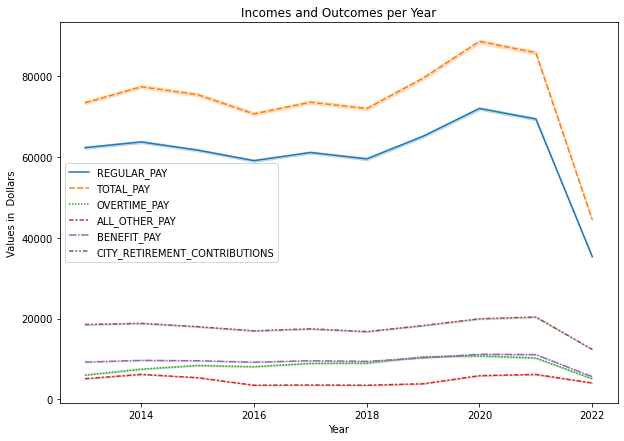

In [14]:
plt.figure(figsize=(10,7))

plt.title('Incomes and Outcomes per Year')
plt.xlabel('Year')
plt.ylabel('Values in  Dollars')

sns.lineplot(data=employees_by_tax_year)

plt.show()

#### * There is a sharp hike in regular pay which in turn affected the total pay in 2019-2020.
#### * All other pay took a slight dip from 2016 – 2019
#### * Everything dipped in 2020 due to covid.

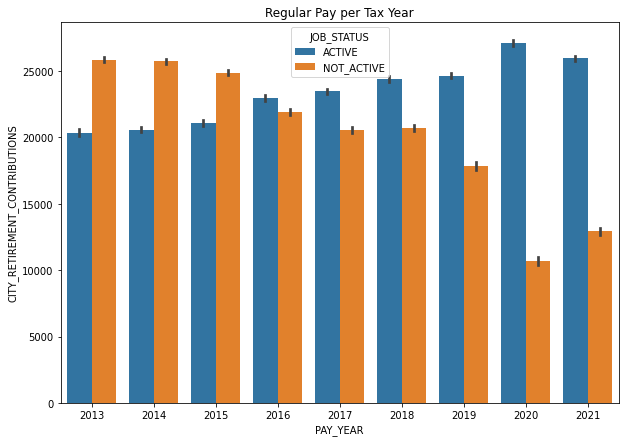

In [16]:
features = ['PAY_YEAR'
           , 'JOB_STATUS'
           , 'CITY_RETIREMENT_CONTRIBUTIONS']

employees_by_tax_year_status = df[features].copy()
employees_by_tax_year_status.set_index('PAY_YEAR', inplace=True)

plt.figure(figsize=(10,7))

plt.title('Regular Pay per Tax Year')
plt.xlabel('Tax Year')
plt.ylabel('Regular Pay')

sns.barplot(data=employees_by_tax_year_status
               , x=employees_by_tax_year_status.index
               , y='CITY_RETIREMENT_CONTRIBUTIONS'
               , hue='JOB_STATUS')

plt.show()

In [17]:
# Gender Wise Trends
features = ['PAY_YEAR'
           , 'GENDER'
           , 'TOTAL_PAY'
           , 'OVERTIME_PAY'
           , 'CITY_RETIREMENT_CONTRIBUTIONS']

employees_by_gender_total_pay = df[features].copy()
employees_by_gender_total_pay.set_index('PAY_YEAR', inplace=True)
employees_by_gender_total_pay.head()

,GENDER,TOTAL_PAY,OVERTIME_PAY,CITY_RETIREMENT_CONTRIBUTIONS
PAY_YEAR,,,,
2017,FEMALE,62532.13,4785.05,3678.0
2017,FEMALE,161685.87,16340.50,9186.0
2017,MALE,258383.42,0.00,16228.0
2017,MALE,121949.85,7824.99,6699.0
2017,MALE,125196.24,22284.37,6689.0


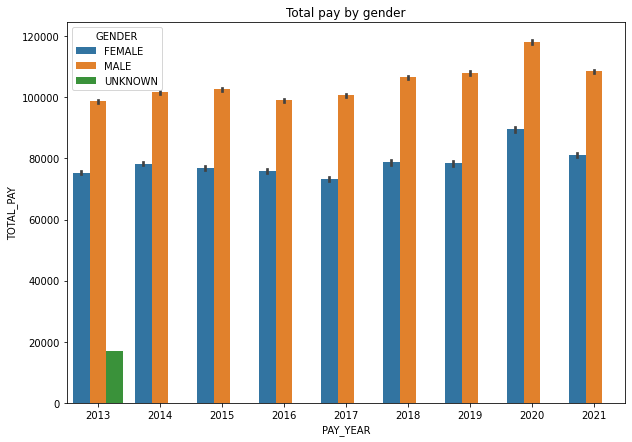

In [20]:
plt.figure(figsize=(10,7))

plt.title('Total pay by gender')
plt.xlabel('Year')
plt.ylabel('Pay')

sns.barplot(data=employees_by_gender_total_pay
               , x=employees_by_gender_total_pay.index
               , y='TOTAL_PAY'
               , hue='GENDER')

plt.show()

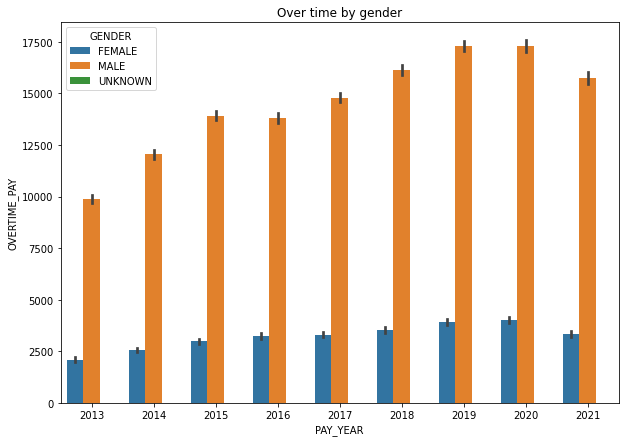

In [21]:
plt.figure(figsize=(10,7))

plt.title('Over time by gender')
plt.xlabel('Year')
plt.ylabel('Pay')

sns.barplot(data=employees_by_gender_total_pay
               , x=employees_by_gender_total_pay.index
               , y='OVERTIME_PAY'
               , hue='GENDER')

plt.show()

#### * Men in general get paid more than women
#### * Upon further analysis men in general also work more overtime than women.

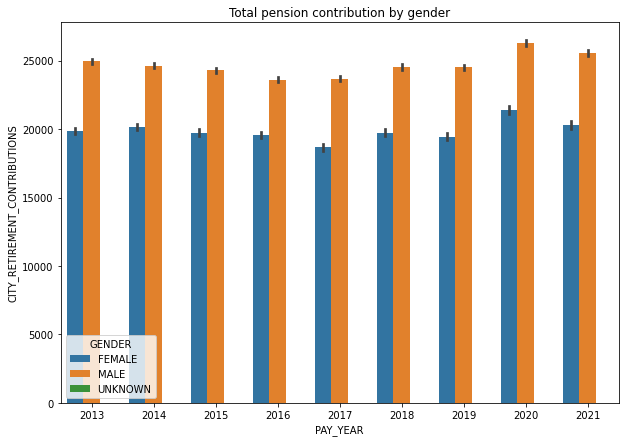

In [22]:
plt.figure(figsize=(10,7))

plt.title('Total pension contribution by gender')
plt.xlabel('Year')
plt.ylabel('Contribution')

sns.barplot(data=employees_by_gender_total_pay
               , x=employees_by_gender_total_pay.index
               , y='CITY_RETIREMENT_CONTRIBUTIONS'
               , hue='GENDER')


plt.show()

#### * When it comes to pension contribution men are slightly paying more than women.

In [23]:
# Ethnicity Wise Trends
features = [ 'ETHNICITY'
           , 'TOTAL_PAY'
           , 'OVERTIME_PAY'
           , 'CITY_RETIREMENT_CONTRIBUTIONS']

employees_by_ethnicity = df[features].copy()

grp_order = employees_by_ethnicity.groupby('ETHNICITY').TOTAL_PAY.agg('mean').sort_values(ascending=False).index
grp_order1 = employees_by_ethnicity.groupby('ETHNICITY').CITY_RETIREMENT_CONTRIBUTIONS.agg('mean').sort_values(ascending=False).index

employees_by_ethnicity.head()

,ETHNICITY,TOTAL_PAY,OVERTIME_PAY,CITY_RETIREMENT_CONTRIBUTIONS
RECORD_NBR,,,,
303030303632,HISPANIC,62532.13,4785.05,3678.0
3030303036,ASIAN AMERICAN,161685.87,16340.50,9186.0
303030313232,BLACK,258383.42,0.00,16228.0
303030313632,ASIAN AMERICAN,121949.85,7824.99,6699.0
303030323632,HISPANIC,125196.24,22284.37,6689.0


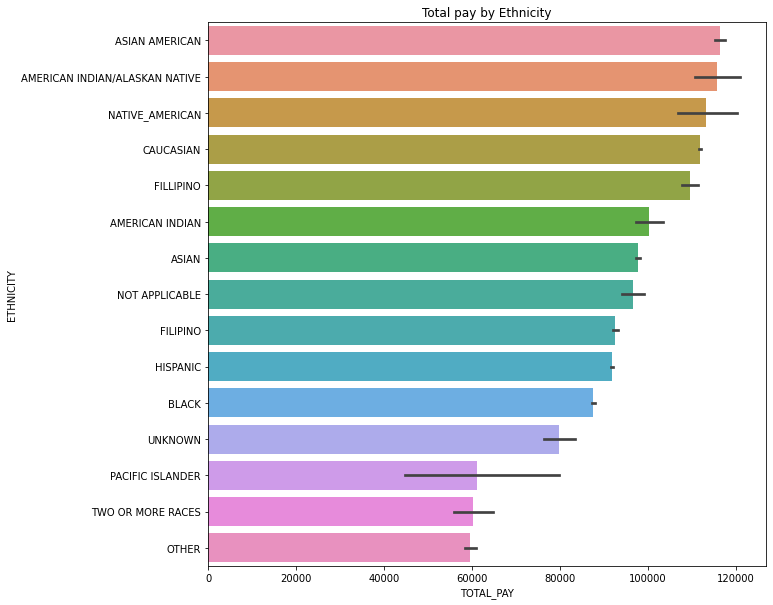

In [24]:
plt.figure(figsize=(10,10))

plt.title('Total pay by Ethnicity')
plt.xlabel('Year')
plt.ylabel('Pay')

fig1 = sns.barplot(data=employees_by_ethnicity
               , x='TOTAL_PAY'
               , y='ETHNICITY'
               , order=grp_order)

plt.show()

#### * When it comes to ethnicity Asian American, American Indian/ Alaskan Native, Native Americans, Caucasians, and Filipino are the Top 5 top earners.

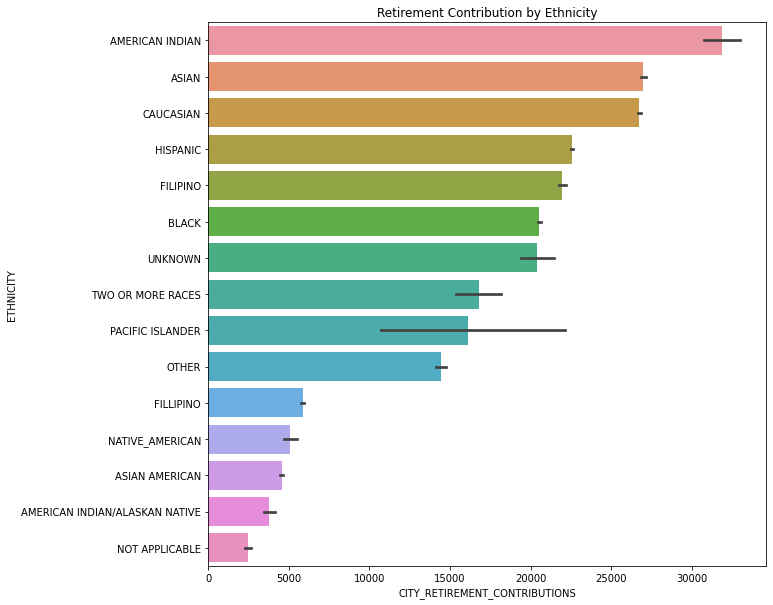

In [25]:
plt.figure(figsize=(10,10))

plt.title('Retirement Contribution by Ethnicity')
plt.xlabel('Year')
plt.ylabel('Pay')

sns.barplot(data=employees_by_ethnicity
               , x='CITY_RETIREMENT_CONTRIBUTIONS'
               , y='ETHNICITY'
               , order=grp_order1)

plt.show()

#### * When it comes to retirement contributions American Indians, Asians, Caucasians, Hispanics, and Filipino are the Top 5 contributors. 

In [26]:
# Dept Wise Trends
features = [ 'DEPARTMENT_TITLE'
           , 'TOTAL_PAY'
           , 'CITY_RETIREMENT_CONTRIBUTIONS']

employees_by_dept = df[features].copy()

grp_order = employees_by_dept.groupby('DEPARTMENT_TITLE').TOTAL_PAY.agg('mean').sort_values(ascending=False).index
grp_order1 = employees_by_dept.groupby('DEPARTMENT_TITLE').CITY_RETIREMENT_CONTRIBUTIONS.agg('mean').sort_values(ascending=False).index

employees_by_dept.head()

,DEPARTMENT_TITLE,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS
RECORD_NBR,,,
303030303632,WATER AND POWER,62532.13,3678.0
3030303036,WATER AND POWER,161685.87,9186.0
303030313232,WATER AND POWER,258383.42,16228.0
303030313632,WATER AND POWER,121949.85,6699.0
303030323632,WATER AND POWER,125196.24,6689.0


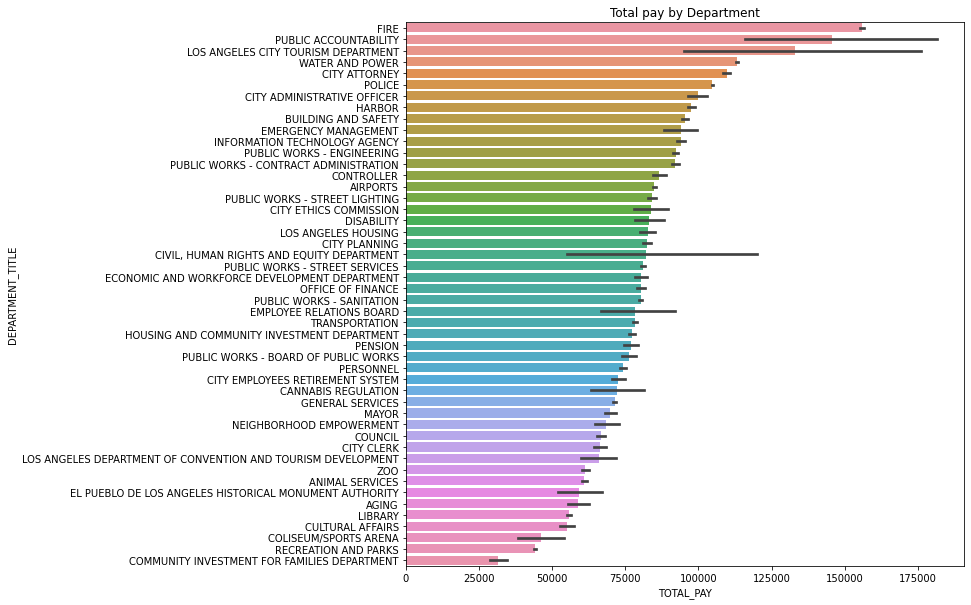

In [27]:

plt.figure(figsize=(10,10))

plt.title('Total pay by Department')
plt.xlabel('Year')
plt.ylabel('Pay')

fig1 = sns.barplot(data=employees_by_dept
               , x='TOTAL_PAY'
               , y='DEPARTMENT_TITLE'
               , order=grp_order)

plt.show()

#### * When it comes to departments Fire, Public accountability, Los Angeles City Tourism, Water and power, and City attorney are the top 5 highest paid in average.
#### * Library, Cultural Affairs, Coliseum, Parks and recreation, CIFD are the least paid.

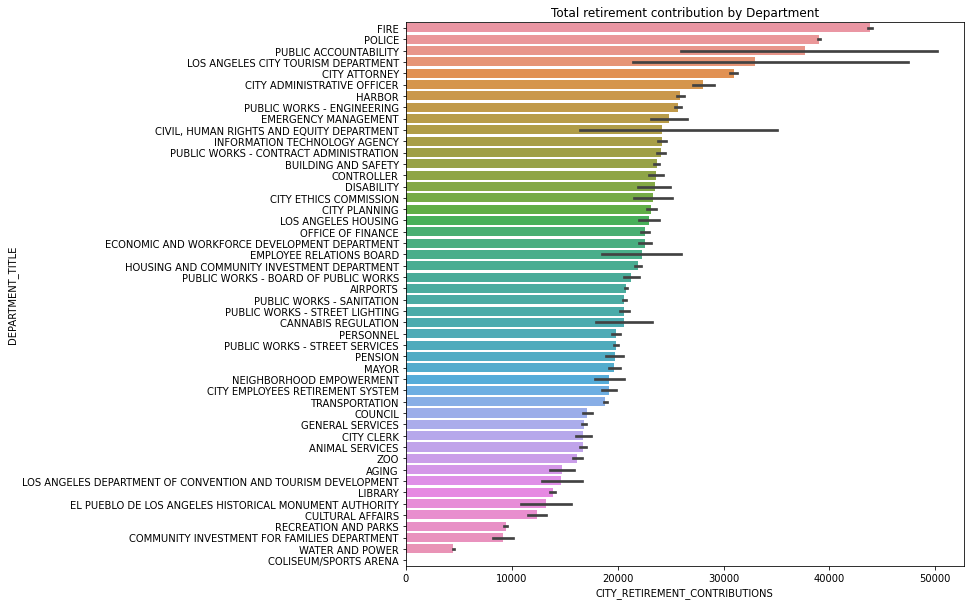

In [28]:
plt.figure(figsize=(10,10))

plt.title('Total retirement contribution by Department')
plt.xlabel('Year')
plt.ylabel('Pay')

fig1 = sns.barplot(data=employees_by_dept
               , x='CITY_RETIREMENT_CONTRIBUTIONS'
               , y='DEPARTMENT_TITLE'
               , order=grp_order1)

plt.show()

#### * When it comes to retirement contribution Fire, Public accountability, Los Angeles City Tourism, police, and City attorneys are the top 5 highest contributors in average.

In [29]:
# Job Wise Trends

features = [ 'JOB_TITLE'
           , 'TOTAL_PAY']

employees_by_job = df[features].copy()

employees_by_job.head(15)

,JOB_TITLE,TOTAL_PAY
RECORD_NBR,,
303030303632,CUSTODIAN,62532.13
3030303036,UTILITY ADMINISTRATOR,161685.87
303030313232,WATER SERVICES MANAGER,258383.42
303030313632,WTR TRTMT OPR,121949.85
303030323632,ELTL MCHC,125196.24
3030303333,WTR SRVC REPTV,96163.97
303030333732,MTNC LABORER,73425.66
303030343031,MTNC CONSTR HLPR,113673.35
303030343632,SAFETY ADMINISTRATOR,157416.00


In [30]:
employees_by_job1 = employees_by_job.groupby('JOB_TITLE').mean().reset_index()

employees_by_job1 = employees_by_job1.sort_values('TOTAL_PAY', ascending=False)
print(employees_by_job1)

                                        JOB_TITLE      TOTAL_PAY
347                           CHIEF PORT PILOT II  462211.640000
1322                                PORT PILOT II  381512.918774
905                         GNL MGR & CHF ENGR WP  355538.310000
340                               CHIEF OF POLICE  337302.917000
330                     CHIEF LEGISLATIVE ANALYST  335360.878000
...                                           ...            ...
867   GANG REDUCTION YOUTH DEVELOPMENT WORKER III   17014.375000
2038               YOUTH EMPLOYMENT SPECIALIST II   16886.826923
1056                        LOCKER ROOM ATTENDANT   16768.485455
891    GENERAL MANAGER NEIGHBORHOOD EMPOWERMENT I   16601.400000
650                                ELECTION CLERK   16200.360000

[2051 rows x 2 columns]


In [31]:
employees_by_job1_top = employees_by_job1.head(10)
print(employees_by_job1_top)

                                           JOB_TITLE      TOTAL_PAY
347                              CHIEF PORT PILOT II  462211.640000
1322                                   PORT PILOT II  381512.918774
905                            GNL MGR & CHF ENGR WP  355538.310000
340                                  CHIEF OF POLICE  337302.917000
330                        CHIEF LEGISLATIVE ANALYST  335360.878000
835                          FIRE HELICOPTER PILOT V  319438.991111
875                         GENERAL MANAGER AIRPORTS  318611.289091
874   GENERAL MANAGER & CHIEF ENGINEER WATER & POWER  313082.660000
1741                                      SR LD DSPR  296915.067107
885                GENERAL MANAGER HARBOR DEPARTMENT  287521.309091


#### * When it comes to jobs CHIEF PORT PILOT II, PORT PILOT II, GNL MGR & CHF ENGR WP are the top 3 highest paid jobs.

In [32]:
employees_by_job1_least = employees_by_job1.tail(10)
print(employees_by_job1_least)

                                        JOB_TITLE     TOTAL_PAY
178           ASSISTANT PARK SERVICES ATTENDANT I  17585.673806
1860                      TAX RENEWAL ASSISTANT I  17487.657778
1158                                 MUSEUM GUIDE  17378.723797
1713                 SPECIAL PROGRAM ASSISTANT II  17292.150324
1002                        JANITORIAL SUPERVISOR  17220.110000
867   GANG REDUCTION YOUTH DEVELOPMENT WORKER III  17014.375000
2038               YOUTH EMPLOYMENT SPECIALIST II  16886.826923
1056                        LOCKER ROOM ATTENDANT  16768.485455
891    GENERAL MANAGER NEIGHBORHOOD EMPOWERMENT I  16601.400000
650                                ELECTION CLERK  16200.360000


#### * ELECTION CLERK, GENERAL MANAGER NEIGHBORHOOD EMPOWERMENT I, and LOCKER ROOM ATTENDANT are the lowest paid jobs.